In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [42]:
caldf = pd.read_csv("4780MHZ_pickoffPower.csv")
caldf

,Set Power (dBm),Pick-off power (dBm)
0,-40,-32.05
1,-35,-26.98
2,-30,-21.92
3,-27,-18.55
4,-25,-16.50
5,-20,-11.56
6,-19,-10.43
7,-18,-9.52
8,-17,-8.55
9,-16,-7.53


<IPython.core.display.Javascript object>


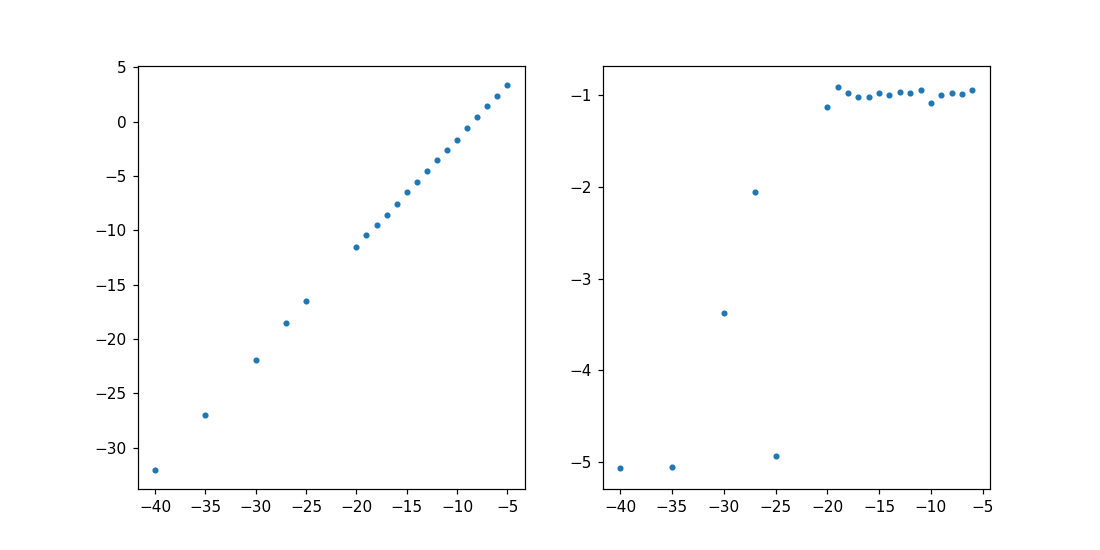

In [44]:
x_dat = np.array(caldf["Set Power (dBm)"])
y_dat = np.array(caldf["Pick-off power (dBm)"])

fig,axar = plt.subplots(1,2,figsize=(10,5))
ax = axar[0]
ax.errorbar(x_dat,y_dat,yerr=np.ones(y_dat.shape)*0.02,fmt=".")
ax = axar[1]
x_diff = x_dat[:-1][:]
y_diff = (y_dat[:-1]-y_dat[1:])[:]
ax.errorbar(x_diff,y_diff,yerr=np.ones(y_diff.shape)*0.02,fmt=".")
fig.show()

<IPython.core.display.Javascript object>


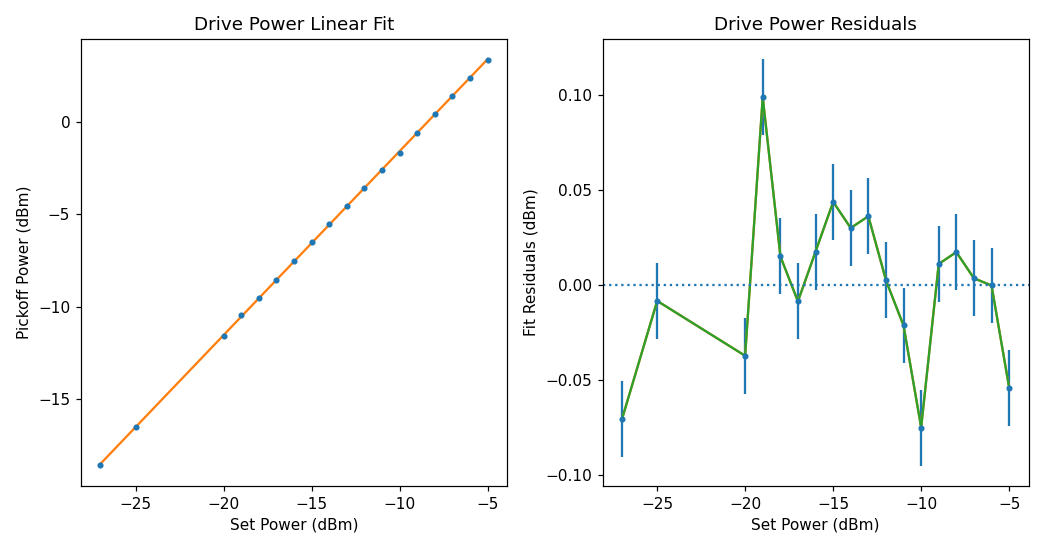

In [58]:
x_dat = np.array(caldf["Set Power (dBm)"])[3:]
y_dat = np.array(caldf["Pick-off power (dBm)"])[3:]

func = lambda x, m, b: m * x + b

guess = [1,0]
popt, pcov = curve_fit(func,x_dat,y_dat,sigma=np.ones(y_dat.shape)*0.02,p0=guess)
perr = np.sqrt(np.diag(pcov))

fig, axar = plt.subplots(1,2,figsize=(9.5,5))
ax = axar[0]
ax.errorbar(x_dat, y_dat, yerr=np.ones(y_dat.shape)*0.02, fmt=".")
xlin = np.linspace(min(x_dat),max(x_dat),1000)
ylin = np.interp(xlin, x_dat, y_dat)
ax.plot(xlin,func(xlin,*popt))
ax.set_title("Drive Power Linear Fit")
ax.set_xlabel("Set Power (dBm)")
ax.set_ylabel("Pickoff Power (dBm)")

fint = interp1d(x_dat, y_dat, kind='linear')

ax = axar[1]
ax.errorbar(x_dat, y_dat-func(x_dat,*popt), yerr=np.ones(y_dat.shape)*0.02, fmt=".")

ax.plot(xlin,ylin-func(xlin,*popt))
ax.plot(xlin,fint(xlin)-func(xlin,*popt))
ax.axhline(0,ls=":")
ax.set_title("Drive Power Residuals")
ax.set_xlabel("Set Power (dBm)")
ax.set_ylabel("Fit Residuals (dBm)")


fig.tight_layout()
fig.show()